In [1]:
pip install pandas scikit-learn matplotlib


In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
# Load the dataset

df = pd.read_csv('SalaryData_Test(1).csv')
df



,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
# Data preprocessing
le = LabelEncoder()
df['Salary'] = le.fit_transform(df['Salary'])  # Encode target variable



In [6]:
# Select features and target variable
X = df.drop('Salary', axis=1)
y = df['Salary']



In [7]:
X

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [8]:
y

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int32

In [9]:
# Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)



In [10]:
X_encoded

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)



In [12]:
# Build the SVM model
model = SVC()
model.fit(X_train, y_train)



SVC()

In [13]:
# Make predictions
y_pred = model.predict(X_test)



In [14]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.87      2246
           1       0.75      0.27      0.40       766

    accuracy                           0.79      3012
   macro avg       0.77      0.62      0.64      3012
weighted avg       0.78      0.79      0.75      3012

Confusion Matrix:
 [[2176   70]
 [ 557  209]]


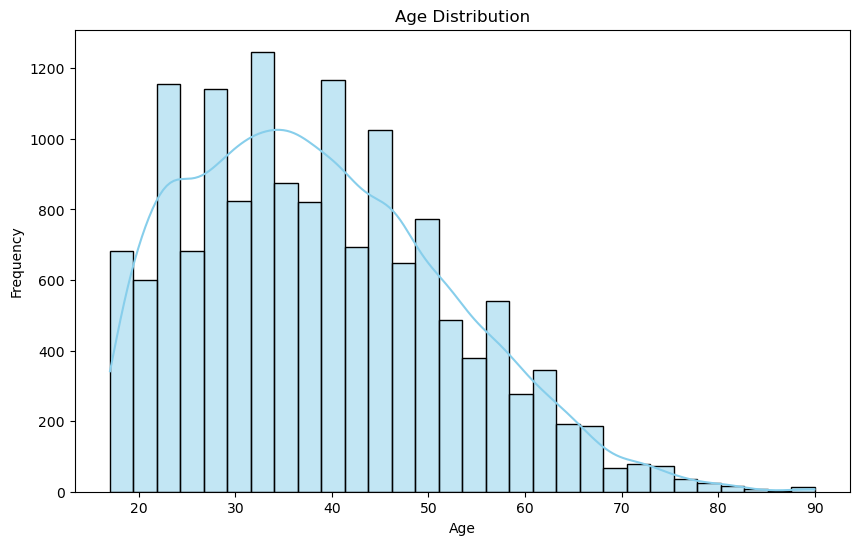

In [16]:
# Visualization 1: Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



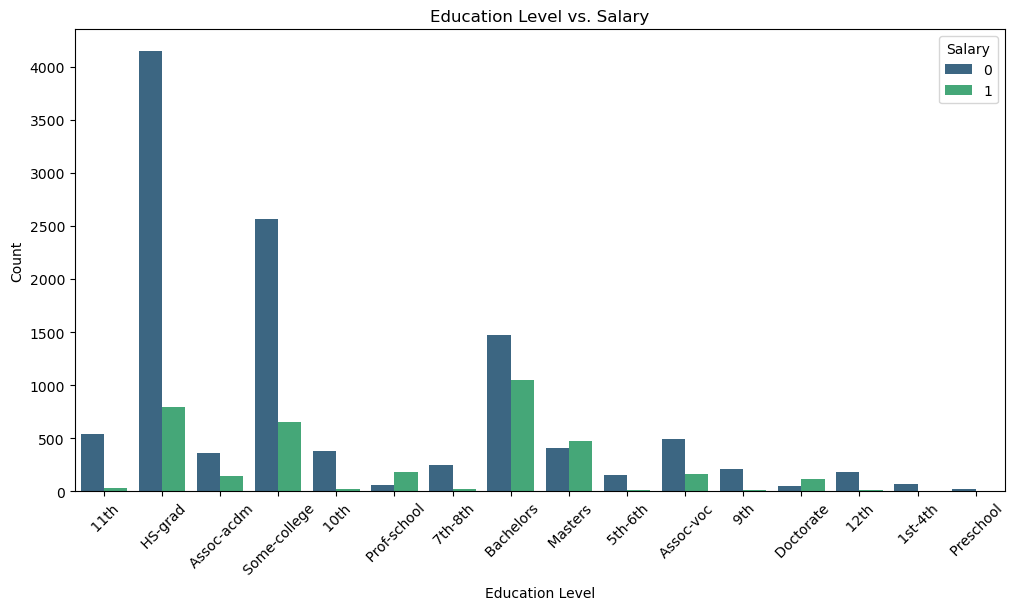

In [17]:
# Visualization 2: Education Level vs. Salary
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='Salary', data=df, palette='viridis')
plt.title('Education Level vs. Salary')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



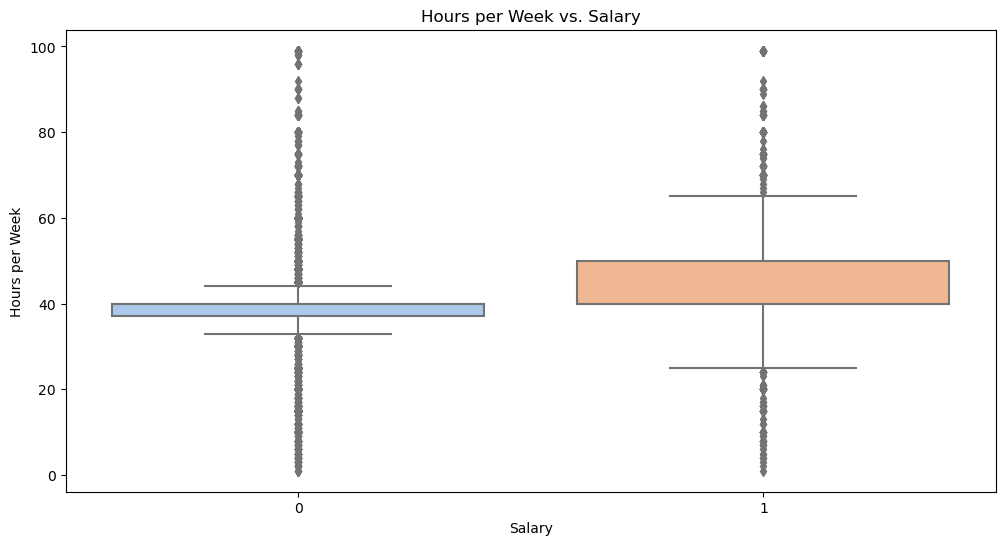

In [18]:
# Visualization 3: Hours per Week vs. Salary
plt.figure(figsize=(12, 6))
sns.boxplot(x='Salary', y='hoursperweek', data=df, palette='pastel')
plt.title('Hours per Week vs. Salary')
plt.xlabel('Salary')
plt.ylabel('Hours per Week')
plt.show()



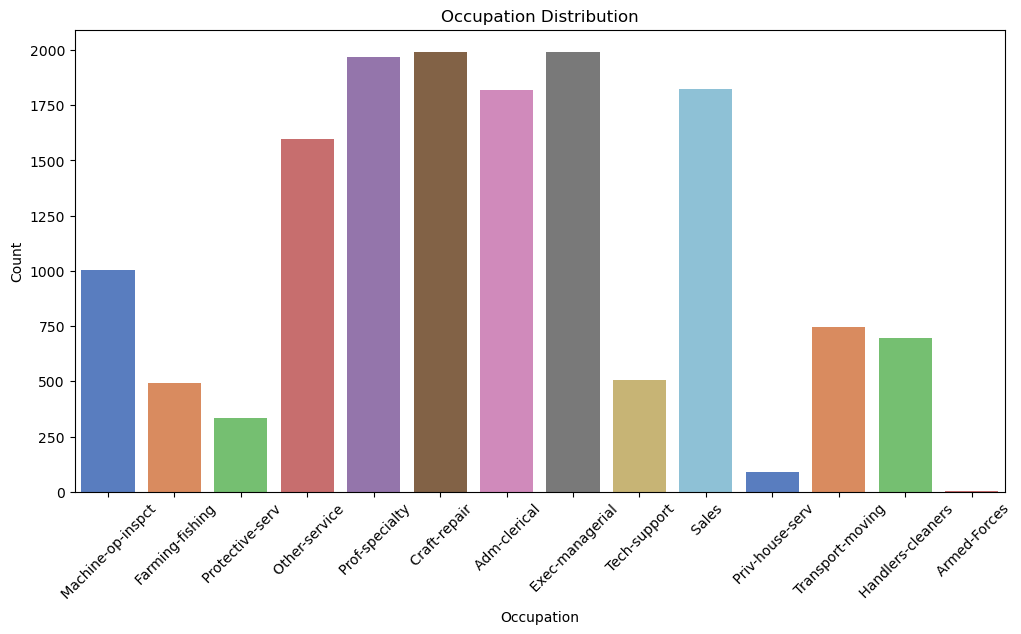

In [19]:
# Visualization 4: Occupation Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='occupation', data=df, palette='muted')
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



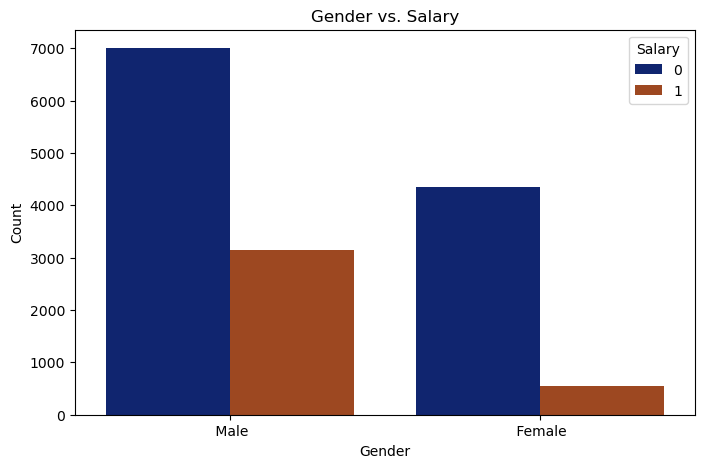

In [20]:
# Visualization 5: Gender vs. Salary
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', hue='Salary', data=df, palette='dark')
plt.title('Gender vs. Salary')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [ ]:
## 2) SalaryData_Train(1)

In [21]:
df = pd.read_csv('SalaryData_Train(1).csv')
df



,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [22]:
# Data preprocessing
le = LabelEncoder()
df['Salary'] = le.fit_transform(df['Salary'])  # Encode target variable



In [23]:
# Select features and target variable
X = df.drop('Salary', axis=1)
y = df['Salary']





In [24]:
X

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [25]:
y

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [26]:
# Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)









In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [28]:

# Build the SVM model
model = SVC()
model.fit(X_train, y_train)

SVC()

In [29]:
# Make predictions
y_pred = model.predict(X_test)


In [30]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


In [32]:
# Display classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87      4490
           1       0.77      0.27      0.40      1543

    accuracy                           0.79      6033
   macro avg       0.78      0.62      0.64      6033
weighted avg       0.79      0.79      0.75      6033

Confusion Matrix:
 [[4362  128]
 [1125  418]]


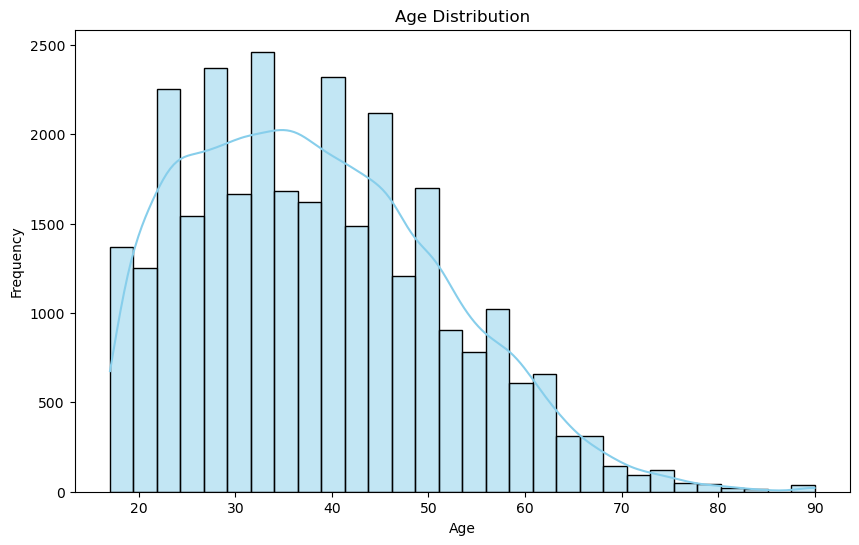

In [33]:
# Visualization 1: Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



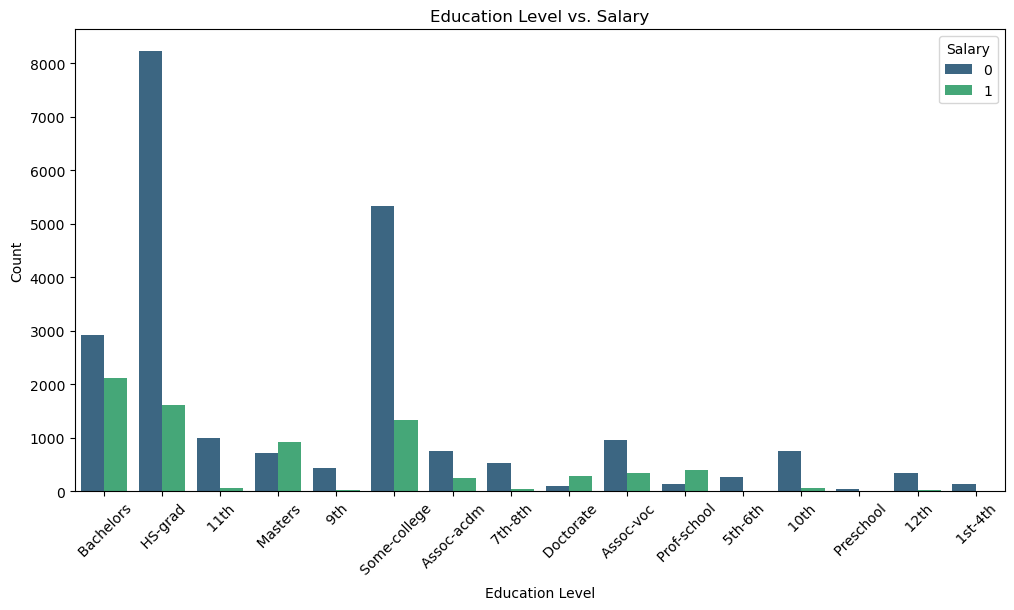

In [34]:
# Visualization 2: Education Level vs. Salary
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='Salary', data=df, palette='viridis')
plt.title('Education Level vs. Salary')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



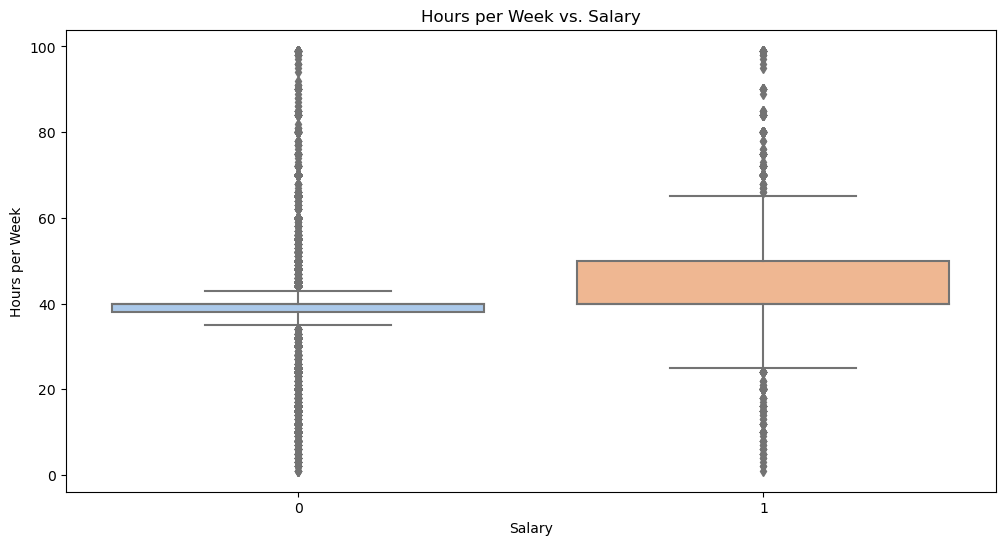

In [35]:
# Visualization 3: Hours per Week vs. Salary
plt.figure(figsize=(12, 6))
sns.boxplot(x='Salary', y='hoursperweek', data=df, palette='pastel')
plt.title('Hours per Week vs. Salary')
plt.xlabel('Salary')
plt.ylabel('Hours per Week')
plt.show()

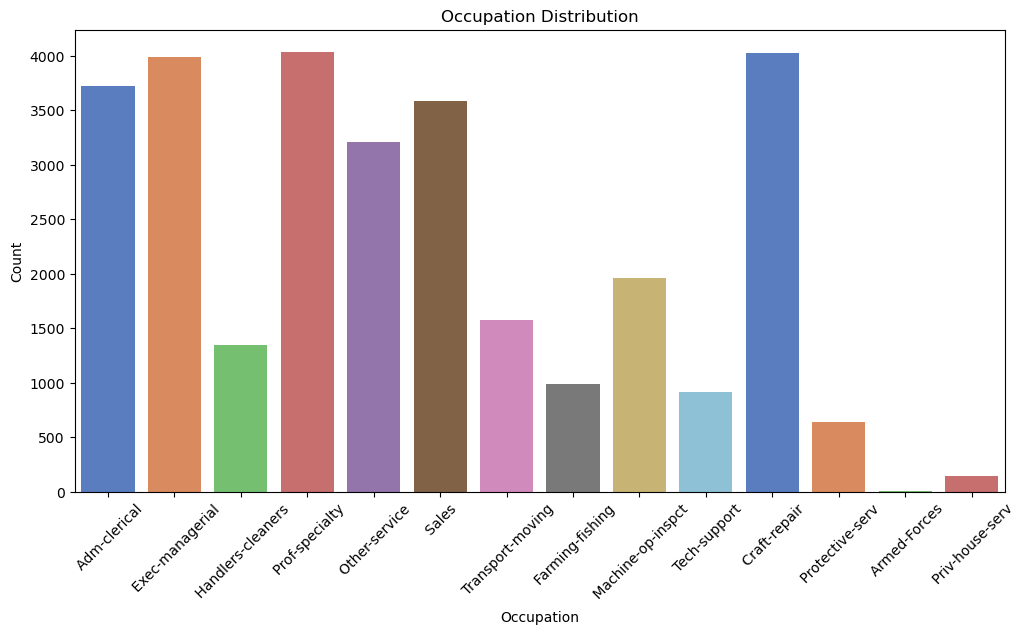

In [36]:
# Visualization 4: Occupation Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='occupation', data=df, palette='muted')
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



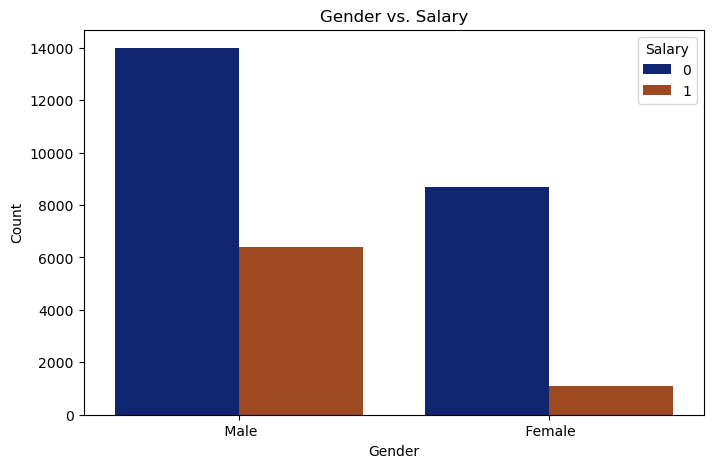

In [37]:
# Visualization 5: Gender vs. Salary
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', hue='Salary', data=df, palette='dark')
plt.title('Gender vs. Salary')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
